# Importar librerías

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos

## Cargaremos los dos csv de alojamientos turísticos

In [ ]:
from google.colab import files
uploaded = files.upload()

Ahora mismo vamos a leer el csv de Airbnb y más adelante el otro csv

In [ ]:
df = pd.read_csv("DF_Proy_Jupiter.csv")
df.head(3)
#df = pd.read_csv("DF_Proy_Jupiter.csv", error_bad_lines=False)

,url,name,header,rating_n_reviews,price,superhost,ciudad
0,/rooms/47505891?adults=1&children=0&enable_m3_...,Loft en València,Loft salvaje y acogedor con un estilo Boho jun...,"4,98 (249)","101 € por noche, inicialmente 122 €",Anfitrión particular,Valencia
1,/rooms/997063990758123324?adults=1&children=0&...,Apartamento en València,Loft exclusivo y encantador de 2 DORMITORIOS,"5,0 (19)","143 € por noche, inicialmente 158 €",Anfitrión particular,Valencia
2,/rooms/989715583684599248?adults=1&children=0&...,Apartamento en València,Apartamento con piscina y terraza,"4,79 (19)","108 € por noche, inicialmente 143 €",Anfitrión profesional,Valencia


# Limpieza y transformación del df de Airbnb

In [ ]:
# Separamos el número del resto del texto para poder utilizarlo en el análisis
df_limpio = df['price'].str.split(' ', expand=True)[0]

In [ ]:
df["precio_por_noche"] = df_limpio

In [ ]:
# Vamos a limpiar la columna de precio quitandole el simbolo de € y cambiando el tipo a float.
df['precio_por_noche']= df['precio_por_noche'].str.split('€', expand=True)[0]

In [ ]:
# Eliminamos los registros donde no hay precio.
df=df[df['precio_por_noche']!=',']

In [ ]:
# Cambiamos el tipo de datos de la columna precio a float para poder manipularlo y lo transformamos de nuevo a numero entero
df['precio_por_noche'] = df['precio_por_noche'].astype(float,copy=True)

In [ ]:
df["precio_por_noche"] = df["precio_por_noche"].astype(int)

Vamos a mirar valores outliers ya que pueden ser que esten abiertos a negociacion y eso no nos interesa.

In [ ]:
df[df["precio_por_noche"] < 31]

,url,name,header,rating_n_reviews,price,superhost,ciudad,precio_por_noche
656,/rooms/16607759?adults=1&children=0&enable_m3_...,Apartamento en L'Hospitalet de Llobregat,Llave sagrada,"4,18 (261)",1.448 € por noche,Anfitrión profesional,Barcelona,1
675,/rooms/16607759?adults=1&children=0&enable_m3_...,Apartamento en L'Hospitalet de Llobregat,Llave sagrada,"4,18 (261)",1.448 € por noche,Anfitrión profesional,Barcelona,1


In [ ]:
df=df[df["precio_por_noche"] != 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 809
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   url               676 non-null    object
 1   name              676 non-null    object
 2   header            676 non-null    object
 3   rating_n_reviews  676 non-null    object
 4   price             676 non-null    object
 5   superhost         676 non-null    object
 6   ciudad            676 non-null    object
 7   precio_por_noche  676 non-null    int32 
dtypes: int32(1), object(7)
memory usage: 44.9+ KB


In [ ]:
# Separamos los ratings de las reviews y eliminamos los parentesis.
df[['rating', 'review']] = df['rating_n_reviews'].str.split(expand=True)

In [ ]:
df['review']=df['review'].str.rstrip(to_strip=')').str.lstrip(to_strip='(')

In [ ]:
# Eliminamos las columnas que no nos proporcionan ninguna utilidad
df = df.drop(["rating_n_reviews","price","header"], axis=1)

In [ ]:
# Comprobamos la cantidad de valores nulos del df
df.isnull().sum()

url                  0
name                 0
superhost            0
ciudad               0
precio_por_noche     0
rating               0
review              47
dtype: int64

In [ ]:
# Hay que transformar "rating" y "review" ya que contienen valores no numéricos como 'Nuevo', 'empty' y 'None'
unique_rating = df['rating'].unique()
print(unique_rating)
unique_review = df['review'].unique()
print(unique_review)

['4,98' '5,0' '4,79' 'Nuevo' '4,77' '4,97' '4,44' '4,87' '4,88' '4,57'
 '4,99' '4,9' '4,91' '4,86' '4,71' '4,89' '4,78' '4,84' '4,63' '4,76'
 '4,69' '4,64' '4,8' '4,92' '4,75' '4,82' '4,95' '4,47' '4,81' '4,0'
 '4,66' '4,93' '4,59' '4,67' '4,7' '4,58' '4,54' '4,85' '4,73' '4,72'
 '4,31' '4,74' '4,48' '4,53' '4,83' '4,34' '4,61' '4,94' '4,56' '4,42'
 '4,68' '4,46' '4,36' '4,28' '4,52' '4,39' '4,62' '4,65' '4,96' '4,5'
 '3,83' '4,6' '4,45' '4,13' '4,51' '4,43' 'empty' '4,33' '3,6' '4,38'
 '3,86' '4,24' '4,49' '4,4' '4,29' '4,41' '4,55']
['249' '19' None '474' '247' '362' '380' '381' '518' '500' '255' '109' '9'
 '52' '26' '93' '22' '309' '21' '346' '104' '179' '56' '327' '219' '132'
 '302' '136' '258' '84' '24' '287' '174' '92' '64' '271' '217' '41' '44'
 '40' '348' '101' '418' '238' '221' '37' '71' '496' '3' '279' '128' '11'
 '377' '134' '100' '237' '17' '51' '307' '184' '33' '12' '173' '170' '161'
 '16' '331' '53' '340' '293' '72' '4' '220' '120' '83' '825' '88' '75'
 '14' '5' '158' '14

In [ ]:
# Calculamos el número de ocurrencias de 'Nuevo' y 'None' en la columna 'rating'
conteo_rating = df['rating'].value_counts(dropna=False)

# Calcula el número de ocurrencias de 'None' en la columna 'review'
conteo_review = df['review'].value_counts(dropna=False)

# Imprime los resultados
print("Número de ocurrencias de 'Nuevo' en rating:")
print(conteo_rating)

print("Número de ocurrencias de 'empty' en rating:")
print(conteo_rating)

print("\nNúmero de ocurrencias de 'None' en review:")
print(conteo_review)

Número de ocurrencias de 'Nuevo' en rating:
Nuevo    43
5,0      32
4,92     25
4,86     24
4,79     22
         ..
4,34      1
4,51      1
4,13      1
3,83      1
4,31      1
Name: rating, Length: 77, dtype: int64
Número de ocurrencias de 'empty' en rating:
Nuevo    43
5,0      32
4,92     25
4,86     24
4,79     22
         ..
4,34      1
4,51      1
4,13      1
3,83      1
4,31      1
Name: rating, Length: 77, dtype: int64

Número de ocurrencias de 'None' en review:
None    47
44       9
19       8
18       7
4        7
        ..
63       1
224      1
81       1
427      1
98       1
Name: review, Length: 284, dtype: int64


In [ ]:
# Excluimos las observaciones con 'Nuevo' en 'rating'
df = df[df['rating'] != 'Nuevo']
df = df[df['rating'] != 'empty']

# Excluimos las observaciones con 'None' en 'review'
df = df[df['review'] != 'None']

In [ ]:
# Cambiamos las comas por puntos en la columna de ratings para poder cambiar el tipo de dato
df['rating'] = df['rating'].str.replace(',','.')

In [ ]:
#Comprobamos los valores únicos de las variables rating y review
df['rating'] = pd.to_numeric(df['rating'])
df['review'] = pd.to_numeric(df['review'])

df.dtypes

url                  object
name                 object
superhost            object
ciudad               object
precio_por_noche      int32
rating              float64
review                int64
dtype: object

In [ ]:
# Comprobamos que hemos eliminado los valores nulos de columna "rating" y "review"
df['rating'].isna().sum()

0

In [ ]:
df['review'].isna().sum()

0

In [ ]:
# Transformar la columna "name". Reemplazamos las tildes.
columnas_con_texto = ['name', 'superhost']
for column in columnas_con_texto:
    df[column] = df[column].str.replace('ó', 'o').str.replace('è', 'e').str.replace('à', 'a').str.replace('á', 'a').str.replace('í', 'i').str.replace('ú', 'u').str.replace('ï', 'i')

In [ ]:
# Convertir en minúsculas las iniciales de las palabras Valencia, Barcelona y Madrid
df['ciudad'] = df['ciudad'].str.lower()

In [ ]:
# Comprobamos cuantas filas y columnas conforma el df después de la limpieza y transformación
df.shape

(629, 7)

In [ ]:
df.head(5)

,url,name,superhost,ciudad,precio_por_noche,rating,review
0,/rooms/47505891?adults=1&children=0&enable_m3_...,Loft en Valencia,Anfitrion particular,valencia,101,4.98,249
1,/rooms/997063990758123324?adults=1&children=0&...,Apartamento en Valencia,Anfitrion particular,valencia,143,5.00,19
2,/rooms/989715583684599248?adults=1&children=0&...,Apartamento en Valencia,Anfitrion profesional,valencia,108,4.79,19
4,/rooms/2211787?adults=1&children=0&enable_m3_p...,Apartamento en Valencia,Anfitrion particular,valencia,61,4.77,474
5,/rooms/26857863?adults=1&children=0&enable_m3_...,Loft en Valencia,Anfitrion particular,valencia,114,4.97,247


# Tratamiento y limpieza del df aportado por WhiteHosting

In [ ]:
# Ahora leemos el segundo csv
df_White_Hosting = pd.read_csv("alojamientos-turisticos-sample.csv")
df_White_Hosting.head(3)

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,3.947.149,-3.346,...,10.0,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,4.138.353,215.388,...,8.0,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,4.046.614,-380.948,...,NaN,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10


In [ ]:
# Lo usamos para poder observar todas las columnas
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
# Vamos a filtrar y quedarnos solamente con los alojamientos que esten localizados en las ciudades de Madrid, Barcelona y Valencia
df_White_Hosting=df_White_Hosting[df_White_Hosting['city'].isin(['madrid', 'barcelona','valencia'])]

In [ ]:
# Eliminación de las columnas que tienen ningún valor para nuestro análisis
df_White_Hosting.drop(["md5","host_id","neighborhood_overview","neighbourhood_name","neighbourhood_district","latitude","longitude","amenities_list","room_type",
                       "has_availability","first_review_date","last_review_date","license","country","description"], axis=1, inplace=True)

In [ ]:
df_White_Hosting.shape

(5551, 25)

In [ ]:
unique_review_scores_rating = df_White_Hosting['review_scores_rating'].unique()
print(unique_review_scores_rating)

unique_review_scores_location = df_White_Hosting['review_scores_location'].unique()
print(unique_review_scores_location)

unique_review_scores_communication = df_White_Hosting['review_scores_communication'].unique()
print(unique_review_scores_communication)

[100.  80.  nan  95.  91.  96.  81.  90.  88.  84.  97.  86.  93.  60.
  94.  70.  83.  92.  99.  87.  85.  73.  89.  79.  75.  98.  82.  77.
  53.  71.  20.  72.  78.  40.  67.  64.  76.  65.  50.  68.  74.  55.
  47.  69.  30.]
[10. nan  9.  8.  7.  6.  2.  5.  4.]
[10. nan  8.  9.  6.  7.  2.  4.  5.]


Al comprobar la cantidad de valores únicos observamos que hay valores nan

In [ ]:
# Procedemos a filtrar los valores nan
# Calculamos el número de ocurrencias de 'NaN'
conteo_review_scores_rating = df_White_Hosting['review_scores_rating'].value_counts(dropna=False)

# Calcula el número de ocurrencias de 'NaN' en la columna 'review_scores_rating'
print(conteo_review_scores_rating)

NaN      1245
100.0     740
95.0      284
93.0      282
96.0      279
97.0      274
98.0      257
80.0      239
90.0      237
94.0      223
92.0      196
91.0      188
87.0      156
99.0      135
89.0      117
88.0      107
85.0       89
86.0       77
84.0       60
83.0       52
60.0       47
82.0       32
81.0       28
78.0       24
70.0       23
73.0       22
75.0       21
77.0       17
67.0       14
76.0       11
40.0       11
79.0       10
72.0       10
71.0        7
50.0        6
20.0        6
74.0        5
64.0        4
65.0        4
68.0        3
69.0        3
53.0        2
55.0        2
47.0        1
30.0        1
Name: review_scores_rating, dtype: int64


Tenemos 1215 en review_scores_rating

In [ ]:
# En la siguientes columnas eliminaremos los registros que tienen los valores nan
df_White_Hosting.dropna(subset=["review_scores_rating",'review_scores_checkin','review_scores_location', 'review_scores_value', 'review_scores_cleanliness',
                                'reviews_per_month', 'review_scores_accuracy', 'review_scores_communication',"bathrooms","bedrooms","beds","maximum_nights"], inplace=True)

In [ ]:
# De esta manera, quedaría el nuevo df sin nulos
df_White_Hosting.isnull().sum()

apartment_id                    0
name                            0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                          49
minimum_nights                  0
maximum_nights                  0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
is_instant_bookable             0
reviews_per_month               0
city                            0
insert_date                     0
dtype: int64

In [ ]:
# Este sería el número de filas que quedaría sin nulos
df_White_Hosting.shape

(4218, 25)

In [ ]:
# El siguiente paso, es tratar los nulos de la columna de precio
df_White_Hosting[df_White_Hosting["price"].isnull()].head(3)

,apartment_id,name,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
352,28349493,Lugaris Rambla Apartamento Familiar,5,2.0,2.0,3.0,NaN,1,1125.0,22.0,49,79.0,349,1,100.0,8.0,10.0,10.0,10.0,8.0,10.0,True,0.15,barcelona,2019-04-10
362,19154124,2528 - AB Gràcia Park Güell 3-1 - Amazing 2-Be...,6,2.0,2.0,4.0,NaN,3,31.0,10.0,30,46.0,321,11,95.0,10.0,9.0,9.0,9.0,9.0,9.0,True,0.74,barcelona,2018-11-07
566,13742696,Modern & Cozy Apartment in Rambla Catalunya,6,2.0,2.0,3.0,NaN,2,1125.0,7.0,30,44.0,275,3,80.0,9.0,8.0,9.0,10.0,10.0,9.0,True,0.15,barcelona,2020-02-16


In [ ]:
f"Porcentaje de nulos sobre columna price: {round(49/5363 * 100, 1)}%"

'Porcentaje de nulos sobre columna price: 0.9%'

Como la cantidad de nulos es mínima, sustituiremos los nulos por la media de precio

In [ ]:
media_precio = df_White_Hosting["price"].mean().round()

In [ ]:
df_White_Hosting["price"].fillna(media_precio, inplace=True)

In [ ]:
# Por último, cambiaremos el tipo de dato de varias variables de df y renombraremos otras
df_White_Hosting["price"] = df_White_Hosting["price"].astype(int)
df_White_Hosting["bathrooms"] = df_White_Hosting["bathrooms"].astype(int)
df_White_Hosting["bedrooms"] = df_White_Hosting["bedrooms"].astype(int)
df_White_Hosting["beds"] = df_White_Hosting["beds"].astype(int)
df_White_Hosting["maximum_nights"] = df_White_Hosting["maximum_nights"].astype(int)
df_White_Hosting["availability_30"] = df_White_Hosting["availability_30"].astype(int)
df_White_Hosting["availability_90"] = df_White_Hosting["availability_90"].astype(int)
df_White_Hosting["review_scores_rating"] = df_White_Hosting["review_scores_rating"].astype(int)
df_White_Hosting["review_scores_accuracy"] = df_White_Hosting["review_scores_accuracy"].astype(int)
df_White_Hosting["review_scores_cleanliness"] = df_White_Hosting["review_scores_cleanliness"].astype(int)
df_White_Hosting["review_scores_checkin"] = df_White_Hosting["review_scores_checkin"].astype(int)
df_White_Hosting["review_scores_communication"] = df_White_Hosting["review_scores_communication"].astype(int)
df_White_Hosting["review_scores_location"] = df_White_Hosting["review_scores_location"].astype(int)
df_White_Hosting["review_scores_value"] = df_White_Hosting["review_scores_value"].astype(int)

df_White_Hosting.rename(columns={"accommodates":"alojamientos","bathrooms":"baños","bedrooms":"dormitorios","beds":"camas","price":"precio"}, inplace=True)

# Preguntas HOSTING:

## 1.¿Cuántos inmuebles únicos hay en el dataset vs airbnb?

In [ ]:
# Comprobamos los valores duplicados de ambas fuentes de datos
df_White_Hosting['apartment_id'].duplicated().sum()

144

In [ ]:
# Y mantenemos el primer valor.
df_White_Hosting = df_White_Hosting.drop_duplicates(subset=['apartment_id'], keep='first')

In [ ]:
df_White_Hosting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 9998
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 4074 non-null   int64  
 1   name                         4074 non-null   object 
 2   alojamientos                 4074 non-null   int64  
 3   baños                        4074 non-null   int32  
 4   dormitorios                  4074 non-null   int32  
 5   camas                        4074 non-null   int32  
 6   precio                       4074 non-null   int32  
 7   minimum_nights               4074 non-null   int64  
 8   maximum_nights               4074 non-null   int32  
 9   availability_30              4074 non-null   int32  
 10  availability_60              4074 non-null   int64  
 11  availability_90              4074 non-null   int32  
 12  availability_365             4074 non-null   int64  
 13  number_of_reviews 

In [ ]:
df['url'].duplicated().sum()

0

In [ ]:
df.shape

(629, 7)

El df de Airbnb cuenta con 629 registros y el df de alojamientos turísticos cuenta con 4074 registros.

## 2.¿Cual es la diferencia en número de inmueble posteados entre los 2 datasets?

In [ ]:
len(df_White_Hosting)-len(df)

3445

Contamos con una diferencia de 3445 inmuebles entre los df

## 3.¿Cuáles son los parámetros que forman el precio?

Comprobamos cuáles varibles tienen un efecto relevante respecto al precio

In [ ]:
df.dtypes

url                  object
name                 object
superhost            object
ciudad               object
precio_por_noche      int32
rating              float64
review                int64
dtype: object

Vamos a empezar por codificar las variables tipo object para poder hacer la matriz de correlacion con ellas tambien.

In [ ]:
#Asignamos en la variable ciudad valores numéricos a Madrid = 1, Barcelona = 2 y Valencia = 3
valor_ciudad = {'madrid': 1, 'barcelona': 2, 'valencia': 3}

# Aplicar el mapeo a la columna 'ciudad'
df['valor_ciudad'] = df['ciudad'].map(valor_ciudad)
df.dtypes

url                  object
name                 object
superhost            object
ciudad               object
precio_por_noche      int32
rating              float64
review                int64
valor_ciudad          int64
dtype: object

In [ ]:
#Comprobamos la cantidad de valores únicos en la variable 'superhost'
unique_superhost = df['superhost'].unique()
print(unique_superhost)

['Anfitrion particular' 'Anfitrion profesional']


In [ ]:
#Dado que sólo hay 2, creamos variables binarias para verificar si tienen alguna influencia en el precio
df = pd.get_dummies(df, columns=['superhost'], prefix='superhost')

In [ ]:
df.rename(columns={"superhost_Anfitrion particular":"A. particular", "superhost_Anfitrion profesional":"A. profesional"}, inplace=True)

In [ ]:
df.head(2)

,url,name,ciudad,precio_por_noche,rating,review,valor_ciudad,A. particular,A. profesional
0,/rooms/47505891?adults=1&children=0&enable_m3_...,Loft en Valencia,valencia,101,4.98,249,3,1,0
1,/rooms/997063990758123324?adults=1&children=0&...,Apartamento en Valencia,valencia,143,5.00,19,3,1,0


In [ ]:
df.dtypes

url                  object
name                 object
ciudad               object
precio_por_noche      int32
rating              float64
review                int64
valor_ciudad          int64
A. particular         uint8
A. profesional        uint8
dtype: object

In [ ]:
matriz_correlacion = df[['precio_por_noche', 'rating', 'review', 'valor_ciudad', 'A. profesional']].corr()
matriz_correlacion

,precio_por_noche,rating,review,valor_ciudad,A. profesional
precio_por_noche,1.000000,0.201916,0.070886,0.037426,0.124240
rating,0.201916,1.000000,0.015459,0.071404,-0.204790
review,0.070886,0.015459,1.000000,0.041683,-0.107287
valor_ciudad,0.037426,0.071404,0.041683,1.000000,-0.153956
A. profesional,0.124240,-0.204790,-0.107287,-0.153956,1.000000


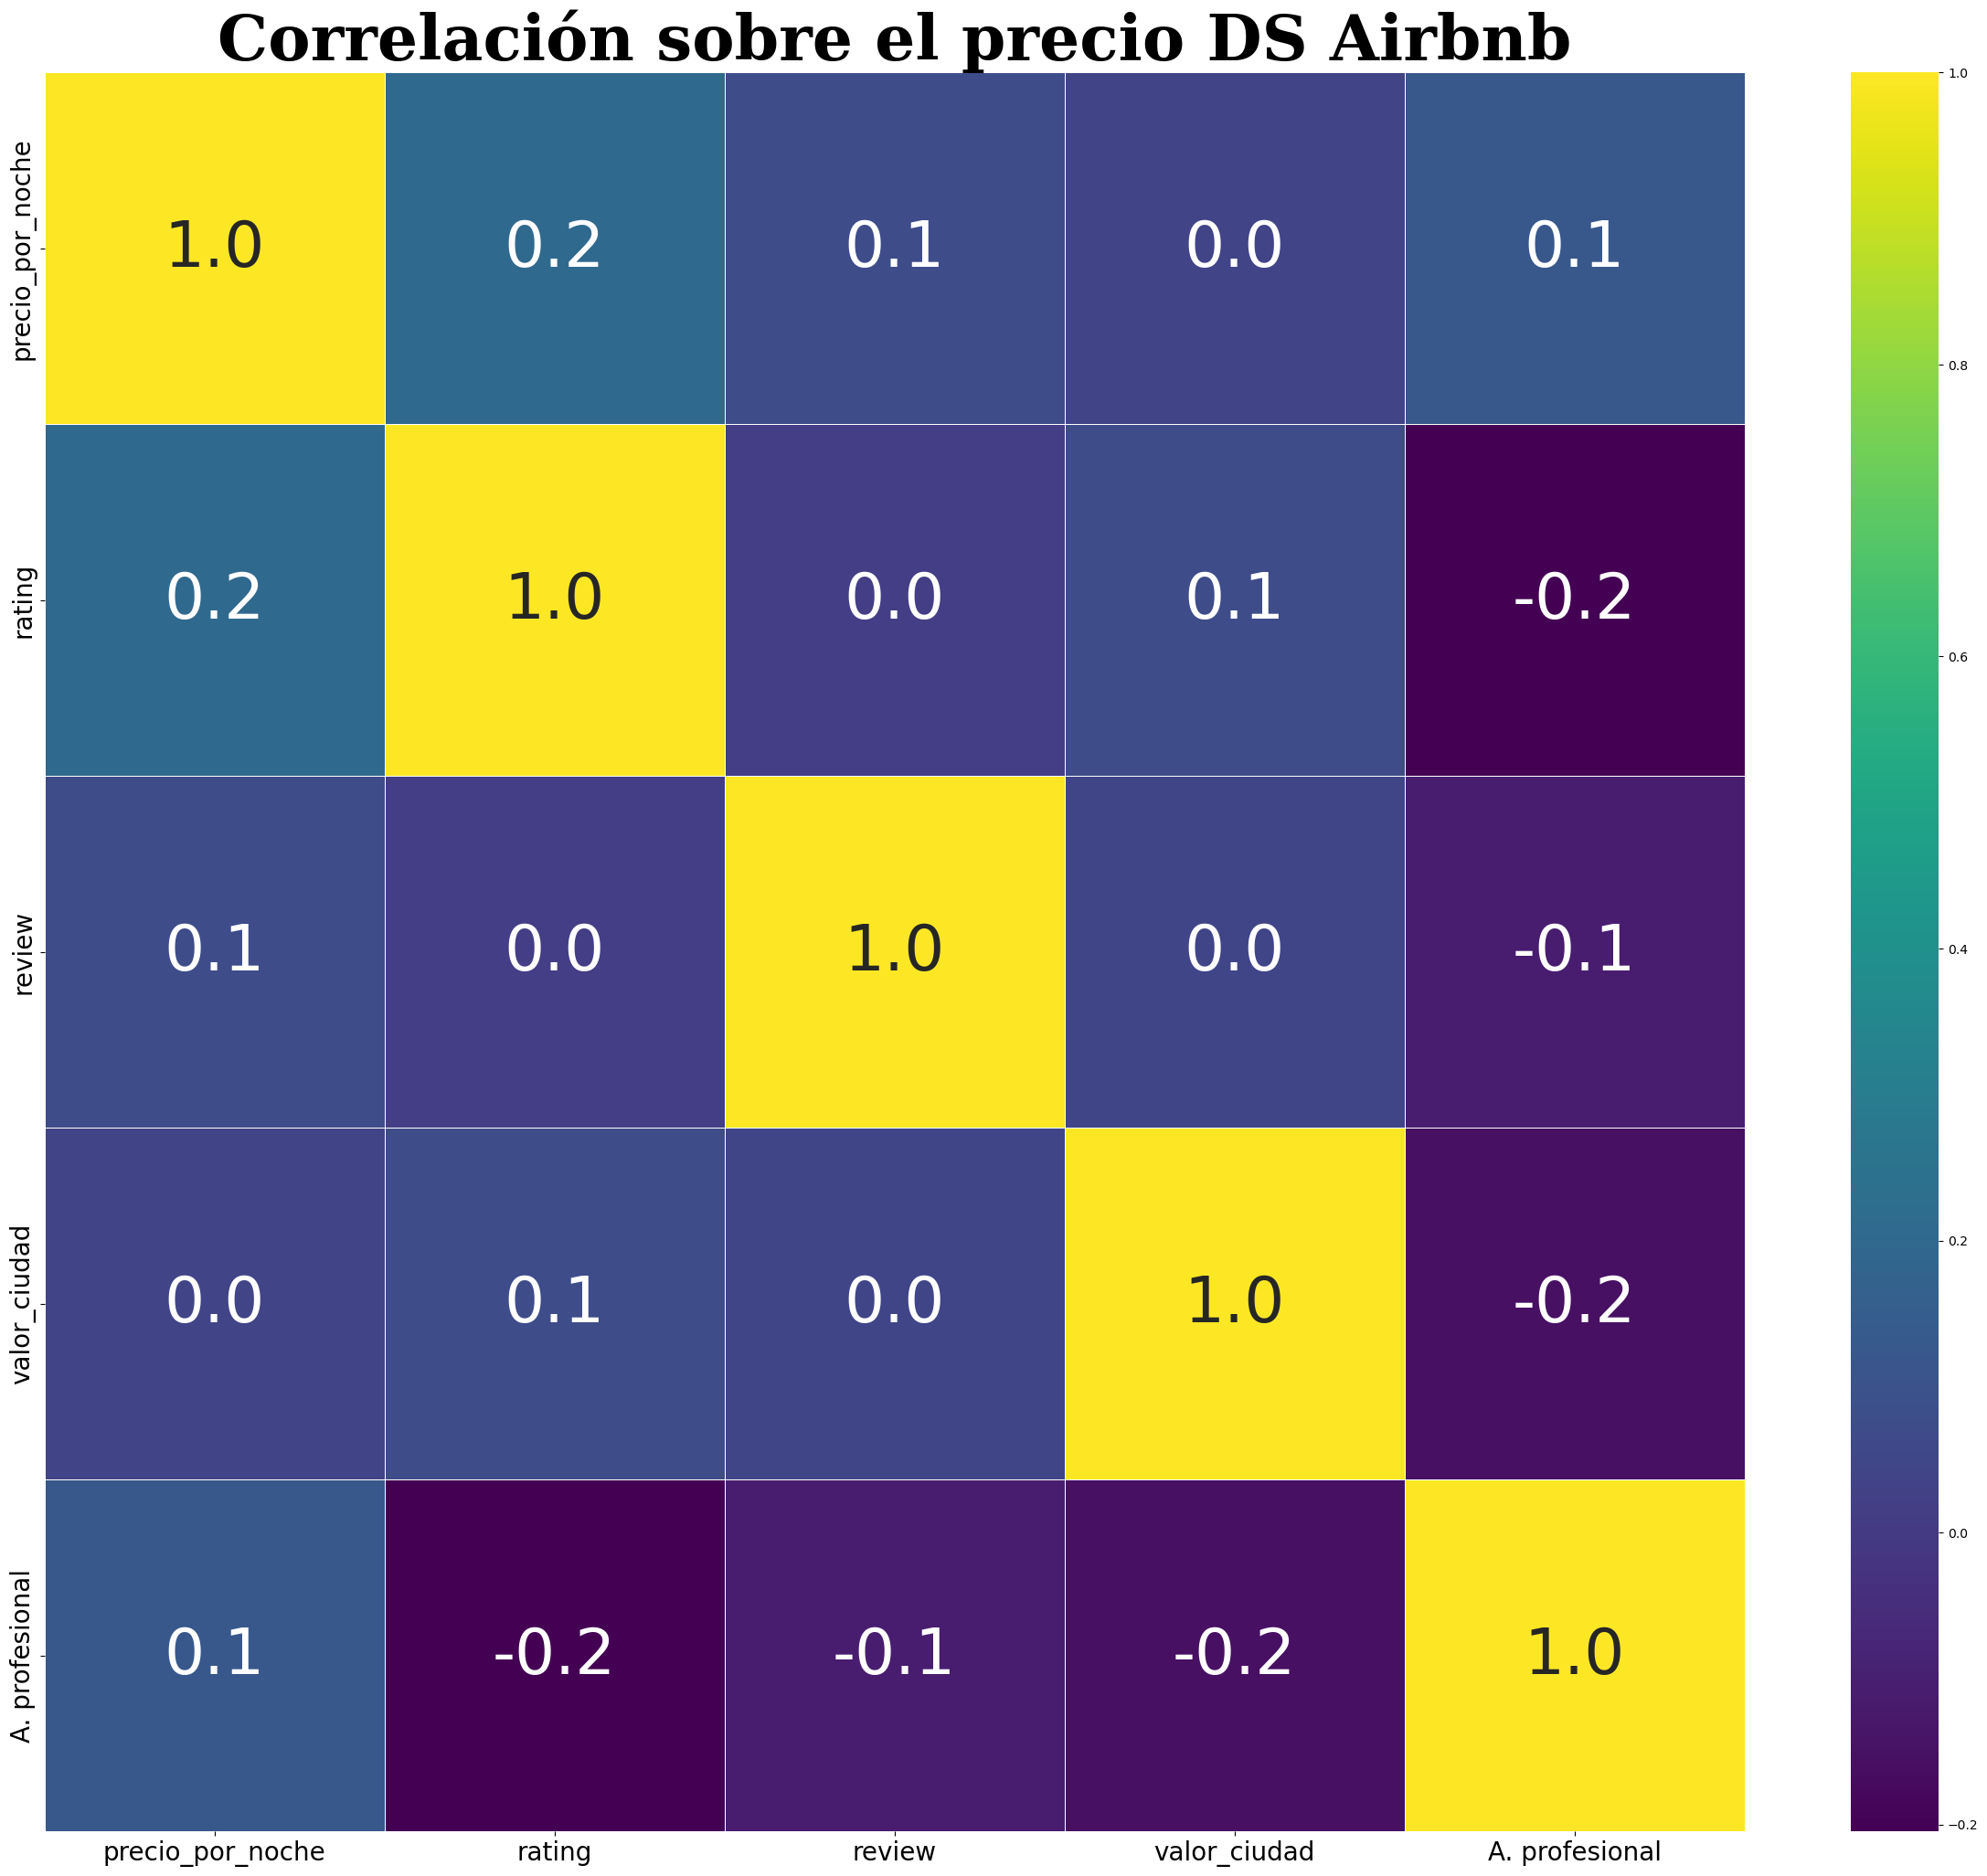

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, cmap="viridis", annot=True, annot_kws={"fontsize":50}, fmt=".1f", linewidths=.5)
font_dict = {'fontsize': 50, 'fontweight': 'bold', 'fontfamily': 'serif'}
plt.title('Correlación sobre el precio DS Airbnb',fontsize=50, fontdict=font_dict)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

En general en df hay una correlación baja (cercana a 0) entre las variables. Rating (0.21) es la que tiene un coeficiente mayor, es decir es la que mas influye en el precio y lo hace de manera directa (mayor rating = mayor precio). superhost_Anfitrión profesional tiene un coeficiente de 0.11 lo que se puede interpretar como que ser anfitrión profesional tiene un ligero efecto positivo sobre el precio final.

In [ ]:
# queremos hacer la Matriz de Correlación en el df_White_Hosting, vamos a ver que columnnas podemos usar
df_White_Hosting.dtypes

apartment_id                     int64
name                            object
alojamientos                     int64
baños                            int32
dormitorios                      int32
camas                            int32
precio                           int32
minimum_nights                   int64
maximum_nights                   int32
availability_30                  int32
availability_60                  int64
availability_90                  int32
availability_365                 int64
number_of_reviews                int64
review_scores_rating             int32
review_scores_accuracy           int32
review_scores_cleanliness        int32
review_scores_checkin            int32
review_scores_communication      int32
review_scores_location           int32
review_scores_value              int32
is_instant_bookable               bool
reviews_per_month              float64
city                            object
insert_date                     object
dtype: object

In [ ]:
#Matriz de Correlación sin nan
matriz_correlacion = df_White_Hosting[['precio', 'review_scores_rating', 'review_scores_location', 'review_scores_value', 'review_scores_cleanliness', 'reviews_per_month', 'review_scores_accuracy', 'review_scores_communication' ]].corr()
matriz_correlacion

,precio,review_scores_rating,review_scores_location,review_scores_value,review_scores_cleanliness,reviews_per_month,review_scores_accuracy,review_scores_communication
precio,1.000000,-0.011388,0.024459,-0.073549,0.038066,-0.073949,-0.018034,-0.034264
review_scores_rating,-0.011388,1.000000,0.412529,0.800319,0.688062,0.104275,0.748303,0.632884
review_scores_location,0.024459,0.412529,1.000000,0.417756,0.301097,0.113396,0.400085,0.364852
review_scores_value,-0.073549,0.800319,0.417756,1.000000,0.621798,0.111666,0.684440,0.545972
review_scores_cleanliness,0.038066,0.688062,0.301097,0.621798,1.000000,0.106212,0.613189,0.474232
reviews_per_month,-0.073949,0.104275,0.113396,0.111666,0.106212,1.000000,0.133597,0.117111
review_scores_accuracy,-0.018034,0.748303,0.400085,0.684440,0.613189,0.133597,1.000000,0.566501
review_scores_communication,-0.034264,0.632884,0.364852,0.545972,0.474232,0.117111,0.566501,1.000000


In [ ]:
df_White_Hosting = pd.get_dummies(df_White_Hosting, columns=['is_instant_bookable'], prefix='bookable')

In [ ]:
matriz_correlacion = df_White_Hosting[['precio', 'alojamientos', 'baños', 'dormitorios', 'camas', 'bookable_True']].corr()
matriz_correlacion

,precio,alojamientos,baños,dormitorios,camas,bookable_True
precio,1.000000,0.568961,0.277722,0.502372,0.508479,0.084368
alojamientos,0.568961,1.000000,0.357396,0.777567,0.843576,0.124361
baños,0.277722,0.357396,1.000000,0.425586,0.413751,0.001292
dormitorios,0.502372,0.777567,0.425586,1.000000,0.777710,0.029764
camas,0.508479,0.843576,0.413751,0.777710,1.000000,0.069265
bookable_True,0.084368,0.124361,0.001292,0.029764,0.069265,1.000000


In [ ]:
matriz_correlacion = df_White_Hosting[['precio', 'alojamientos', 'baños', 'dormitorios', 'camas']].corr()
matriz_correlacion

,precio,alojamientos,baños,dormitorios,camas
precio,1.000000,0.568961,0.277722,0.502372,0.508479
alojamientos,0.568961,1.000000,0.357396,0.777567,0.843576
baños,0.277722,0.357396,1.000000,0.425586,0.413751
dormitorios,0.502372,0.777567,0.425586,1.000000,0.777710
camas,0.508479,0.843576,0.413751,0.777710,1.000000


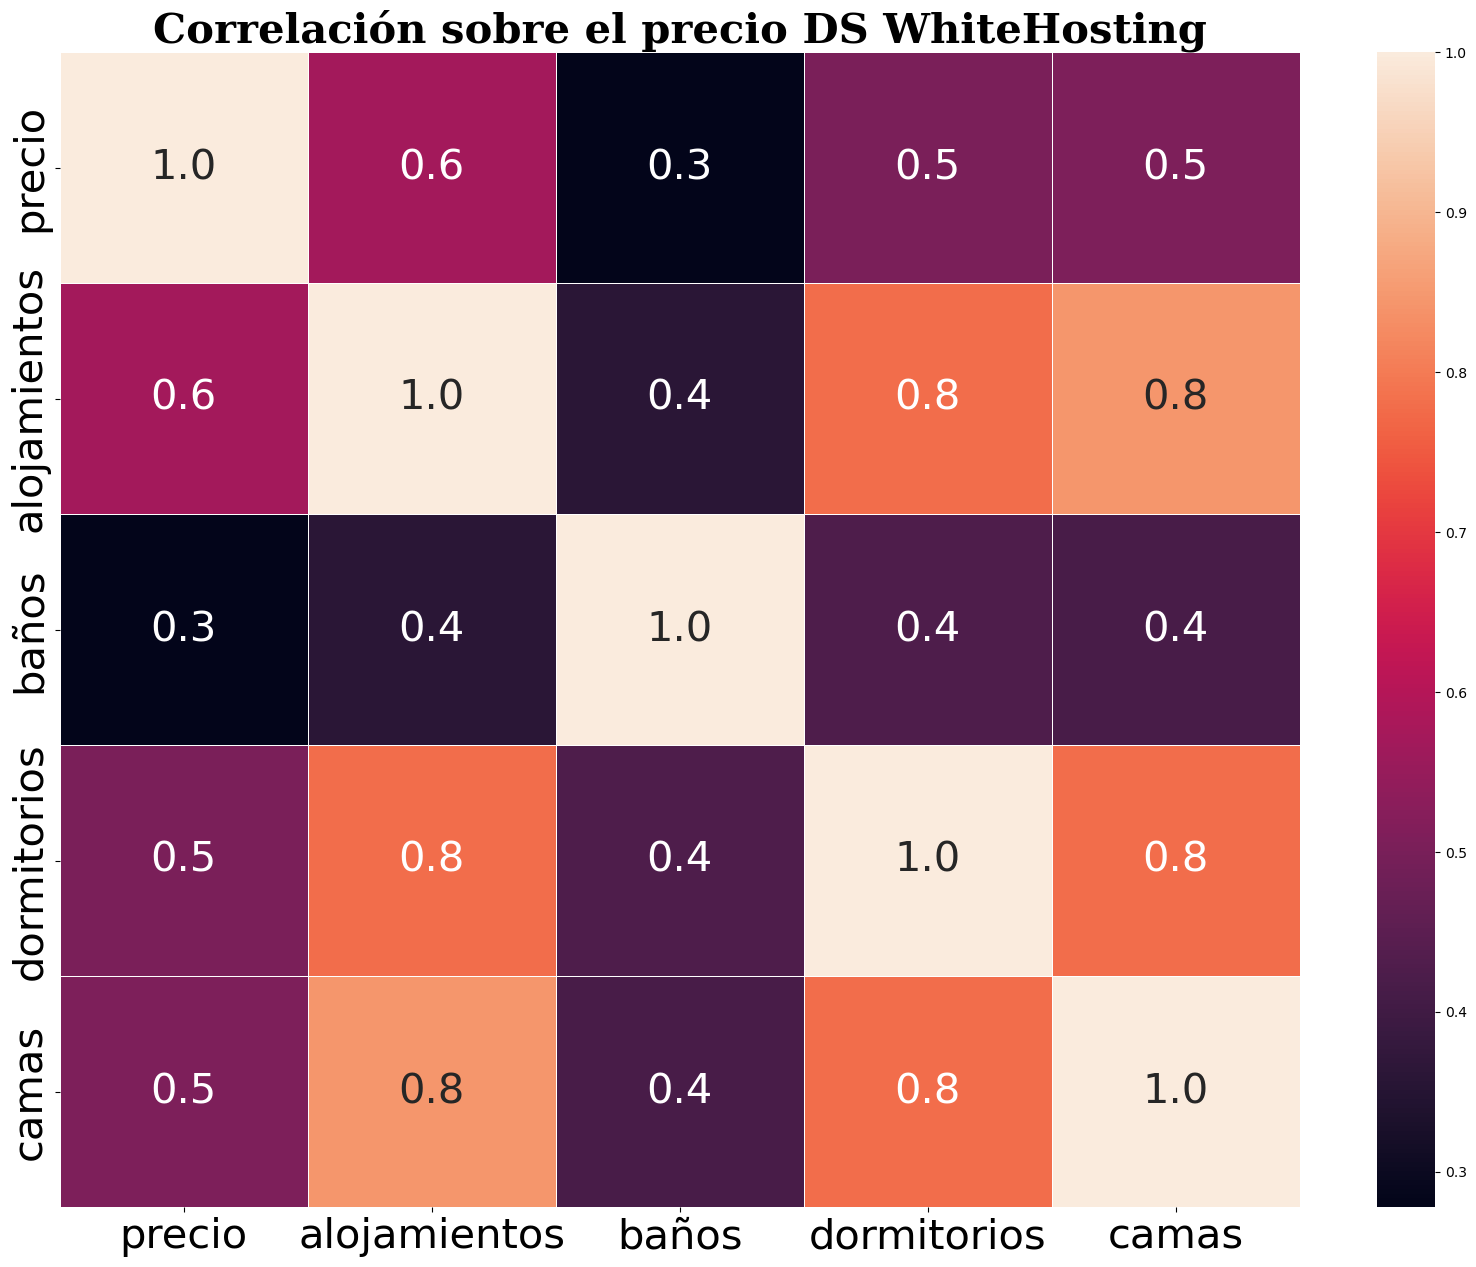

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(matriz_correlacion, cmap="rocket", annot=True, annot_kws={"fontsize":30}, fmt=".1f", linewidths=.5)
font_dict = {'fontsize': 30, 'fontweight': 'bold', 'fontfamily': 'serif'}
plt.title('Correlación sobre el precio DS WhiteHosting',fontsize=30, fontdict=font_dict)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()

In [ ]:
matriz_correlacion = df_White_Hosting[['precio', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'minimum_nights', 'maximum_nights']].corr()
matriz_correlacion

,precio,availability_30,availability_60,availability_90,availability_365,number_of_reviews,minimum_nights,maximum_nights
precio,1.000000,0.064789,0.063775,0.073291,0.165866,-0.014795,-0.022173,0.033760
availability_30,0.064789,1.000000,0.929284,0.856587,0.466359,0.010893,-0.027019,0.012077
availability_60,0.063775,0.929284,1.000000,0.966845,0.542513,0.015609,-0.029712,0.016336
availability_90,0.073291,0.856587,0.966845,1.000000,0.598510,0.020172,-0.030650,0.022604
availability_365,0.165866,0.466359,0.542513,0.598510,1.000000,0.064532,-0.007627,0.106617
number_of_reviews,-0.014795,0.010893,0.015609,0.020172,0.064532,1.000000,-0.046845,-0.050058
minimum_nights,-0.022173,-0.027019,-0.029712,-0.030650,-0.007627,-0.046845,1.000000,0.015757
maximum_nights,0.033760,0.012077,0.016336,0.022604,0.106617,-0.050058,0.015757,1.000000


Si un alojamiento tiene disponibilidad todo el año hay un ligero impacto positivo sobre el precio

En el df_White_Hosting influye de manera más fuerte la variable accommodates sobre el precio. Esto significa que el precio se encuentra más influenciado por la cantidad de gente que se puede hospedar en el.

## 4.¿Son iguales los parámetros en ambas fuentes de datos?

Tras calcular la correlación en ambos conjuntos de datos, se puede determinar que los parámetros que determinan el precio no son iguales en ambas fuentes:


*   La variable rating es la que tiene mayor influencia sobre precio_final y la segunda con más influencia es superhost_Anfitrión profesional
*   Las variables accommodates y beds son las que tienen mayor influencia sobre el precio en df_White_Hosting.


## 5.¿Has podido ver algún inmueble que está en ambas fuentes de datos?, es su valoración la misma?

In [ ]:
# Para poder comprobar esta pregunta nos vamos a relizar un bucle que revise si cada nombre esta en la columna de la otra tabla
df_unicos = df[["name"]]
df_White_Hosting_unicos = df_White_Hosting[["name"]]

In [ ]:
df_unicos.head(10)

,name
0,Loft en Valencia
1,Apartamento en Valencia
2,Apartamento en Valencia
4,Apartamento en Valencia
5,Loft en Valencia
6,Apartamento en Valencia
7,Apartamento en Valencia
8,Apartamento en Valencia
9,Apto. residencial en Mislata
10,Apartamento en Valencia


In [ ]:
df_White_Hosting_unicos.head(3)

,name
0,Piso reformado excelente ubicacion
1,Nice Room in a Penthouse
5,Habitación en Madrid! <<Wifi>>Perfecto para 2!!!


Para llevar a cabo esto, utilizamos un bucle con el cuál podemos comprobar a lo largo de toda la tabla si algún registro coincide con la otra tabla

In [ ]:
nombres_repetidos_df = []
nombres_repetidos_White_Hosting = []

In [ ]:
for name in df_unicos['name']:
  for indice in range(len(df_White_Hosting_unicos['name'])):
    if name in df_White_Hosting_unicos['name']:

      nombres_repetidos_White_Hosting.append(name)

In [ ]:
nombres_repetidos_White_Hosting

[]

In [ ]:
for name in df_White_Hosting_unicos['name']:
  for indice in range(len(df_unicos['name'])):
    if name in df_unicos['name']:
      nombres_repetidos_df.append(name)

In [ ]:
nombres_repetidos_df

[]

A través de esta medida, parece que no existe ninguna coincidencia entre las tablas.

## 6.¿En qué fuentes de datos hay más volatilidad en cuanto al precio? ¿Hay algún tipo de estacionalidad?

Para calcular la volatilidad del precio podemos llevar a cabo dos procedimientos igualmente válidos.

In [ ]:
# Para el primero calcularemos previamente la media del precio de ambas fuentes de datos
media_precio_df_White_Hosting = round(df_White_Hosting["precio"].sum()/ len(df_White_Hosting["precio"]),2)
media_precio_df_White_Hosting

76.63

In [ ]:
media_precio_df = round(df["precio_por_noche"].sum()/ len(df["precio_por_noche"]),2)
media_precio_df

108.69

In [ ]:
# El siguiente paso, es el calculo de varianza
sumatorio_cuadrados = 0
for precios in df_White_Hosting["precio"]:
  sumatorio_cuadrados += (precios - media_precio_df_White_Hosting) ** 2

varianza_White_Hosting = sumatorio_cuadrados/len(df_White_Hosting["precio"] -1)

In [ ]:
varianza_White_Hosting

4237.5710826214645

In [ ]:
sumatorio_cuadrados = 0
for precios in df["precio_por_noche"]:
  sumatorio_cuadrados += (precios - media_precio_df) ** 2

varianza_df = sumatorio_cuadrados/len(df["precio_por_noche"] -1)

In [ ]:
varianza_df

3522.9885324324296

In [ ]:
# Y por último, conociendo el valor de la varianza calculamos cuánto vale la desviación estándar
desv_White_Hosting = np.sqrt(varianza_White_Hosting)

In [ ]:
desv_White_Hosting

65.09662881149426

In [ ]:
desv_df = np.sqrt(varianza_df)
desv_df

59.35476840517895

In [ ]:
# Elaboramos un dataframe en cuál ordenamos los datos de la desviación y la varianza de una manera más organizada
pd.DataFrame([[varianza_White_Hosting, desv_White_Hosting],
              [varianza_df,desv_df]],
             index = [["precio","precio_por_noche"]],
             columns = ["Varianza","Desviacion Estandar"]).round(2)

,Varianza,Desviacion Estandar
precio,4237.57,65.10
precio_por_noche,3522.99,59.35


In [ ]:
# Podemos observar que son los mismos valores
df_White_Hosting.describe()

,apartment_id,alojamientos,baños,dormitorios,camas,precio,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bookable_False,bookable_True
count,4.074000e+03,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,1.873618e+07,3.441581,1.343888,1.506873,2.196613,76.629111,4.652430,719.900344,11.594011,26.496073,43.575356,174.574865,41.985763,91.665194,9.440353,9.284978,9.616102,9.613893,9.580020,9.139421,1.717879,0.458027,0.541973
std,1.124400e+07,2.103777,0.646662,0.924117,1.706382,65.104620,21.591638,509.137191,11.065576,22.013346,32.919007,132.257317,64.148909,8.817312,0.890522,0.996697,0.799519,0.797992,0.746613,0.965500,1.662957,0.498296,0.498296
min,2.185300e+04,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,0.000000,0.000000
25%,9.697159e+06,2.000000,1.000000,1.000000,1.000000,36.000000,1.000000,60.000000,0.000000,2.000000,8.000000,47.000000,5.000000,88.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.430000,0.000000,0.000000
50%,1.873259e+07,3.000000,1.000000,1.000000,2.000000,60.000000,2.000000,1125.000000,9.000000,25.000000,46.000000,168.000000,16.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.150000,0.000000,1.000000
75%,2.655584e+07,4.000000,2.000000,2.000000,3.000000,91.750000,3.000000,1125.000000,22.000000,47.000000,75.000000,310.000000,52.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.590000,1.000000,1.000000
max,4.661573e+07,16.000000,8.000000,8.000000,20.000000,500.000000,1125.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,578.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.910000,1.000000,1.000000


In [ ]:
# Vamos a calcular lo mismo de otra forma mas directa usando las funciones ya implementadas por pandas, empezando por las desviaciones tipicas.
df_White_Hosting["precio"].std()

65.1046195534877

In [ ]:
df["precio_por_noche"].std()

59.40200650447907

In [ ]:
# Y ahora las varianzas.
round(df_White_Hosting["precio"].var(ddof=0),2)

4237.57

In [ ]:
round(df["precio_por_noche"].var(ddof=0),2)

3522.99

La media del precio es mayor en los alojamientos de df de airbnb pero tiene una mayor desviación el df de White_Hosting

En la segunda parte de la pregunta queremos saber si existe algún tipo de estacionalidad.
Para esta pregunta solo podemos realizarla para uno de lo dataframe debido a que tenemos una variable de tiempo para poder responder a la pregunta

In [ ]:
# Para ello seleccionamos la columna de la fecha y nos quedamos solamente con el mes
df_White_Hosting["mes"] = df_White_Hosting['insert_date'].str.split('-', expand=True)[1]
df_White_Hosting["mes"] = df_White_Hosting["mes"].astype(int)

In [ ]:
# A continuación, utilizamos el método apply para crear una columna que represente las estaciones del año y asignarle sus respectivos meses
df_White_Hosting["Estacion"] = df_White_Hosting["mes"].apply(lambda x: "invierno" if x <= 3 else ("primavera" if (x >= 4 and x<=6 ) else ("verano" if (x >=7 and x<=9) else "otoño")))

In [ ]:
df_White_Hosting[["Estacion","mes"]].head(5)

,Estacion,mes
0,otoño,12
1,invierno,1
5,otoño,10
6,primavera,5
7,verano,9


In [ ]:
# Ahora calculamos la media de precio de cada una de las estaciones y creamos una nueva tabla
df_White_Hosting_estaciones = df_White_Hosting[["precio","Estacion"]].groupby("Estacion").agg("mean")

In [ ]:
df_White_Hosting_estaciones

,precio
Estacion,
invierno,76.342779
otoño,72.413759
primavera,79.799419
verano,77.972487


<Axes: title={'center': 'precio'}, xlabel='Estacion'>

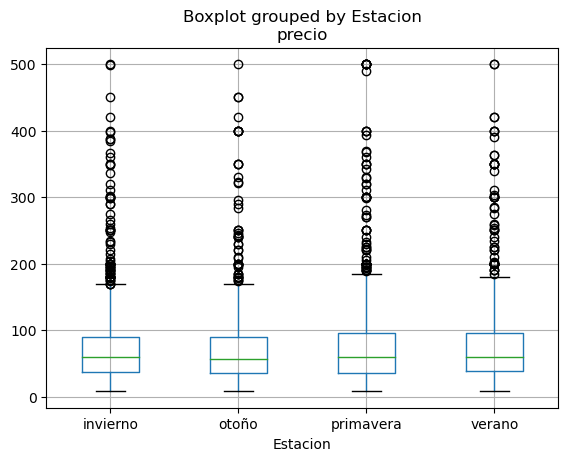

In [ ]:
# Y lo representamos mediante un boxplot
df_White_Hosting.boxplot(column = "precio", by= "Estacion")

Text(0.5, 0, 'precio')

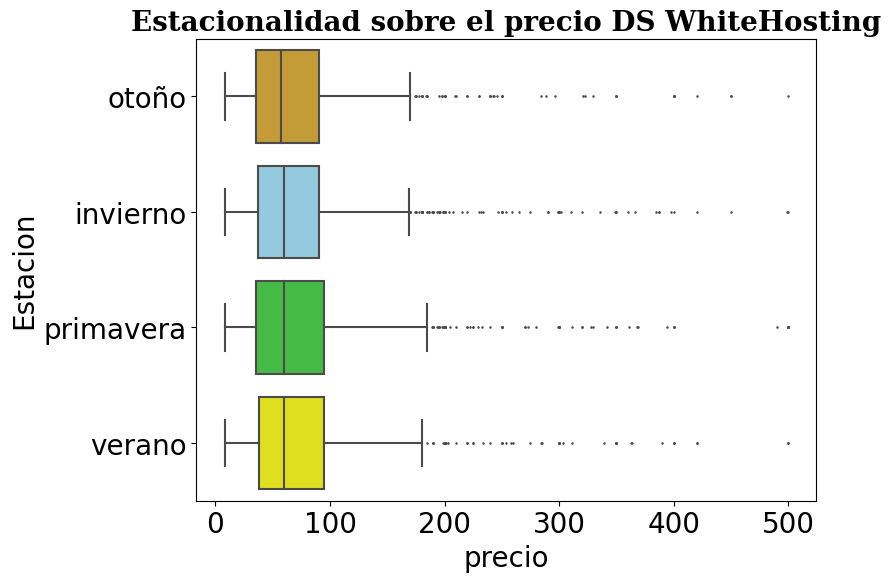

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_White_Hosting[["Estacion","precio"]], x="precio", y="Estacion",fliersize=0.9, palette= {"otoño":"goldenrod","invierno":"skyblue","primavera":"limegreen","verano":"yellow"})
font_dict = {'fontsize': 15, 'fontweight': 'bold', 'fontfamily': 'serif'}
plt.title('Estacionalidad sobre el precio DS WhiteHosting',fontsize=20, fontdict=font_dict)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Estacion", fontsize=20)
plt.xlabel("precio", fontsize=20)

Podemos concluir que los meses de la primera mitad del año (primavera y verano) tienen una media algo superior. Pero respondiendo a la pregunta de la estacionalidad es muy baja, en las cuatro estaciones el precio se mantiene en la misma medida.

## 7. Crea un dataset único de verdad.

En este apartado vamos a crear una dataset único entre las tablas anteriores

In [ ]:
df_White_Hosting.head(1)

,apartment_id,name,alojamientos,baños,dormitorios,camas,precio,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,insert_date,bookable_False,bookable_True,mes,Estacion
0,36187629,Piso reformado excelente ubicacion,4,2,3,3,90,5,20,0,4,34,34,1,100,10,10,10,10,10,10,0.22,valencia,2019-12-31,0,1,12,otoño


In [ ]:
df_White_Hosting.dtypes

apartment_id                     int64
name                            object
alojamientos                     int64
baños                            int32
dormitorios                      int32
camas                            int32
precio                           int32
minimum_nights                   int64
maximum_nights                   int32
availability_30                  int32
availability_60                  int64
availability_90                  int32
availability_365                 int64
number_of_reviews                int64
review_scores_rating             int32
review_scores_accuracy           int32
review_scores_cleanliness        int32
review_scores_checkin            int32
review_scores_communication      int32
review_scores_location           int32
review_scores_value              int32
reviews_per_month              float64
city                            object
insert_date                     object
bookable_False                   uint8
bookable_True            

In [ ]:
# Para ello vamos seleccionar las columnas de ambas tablas que coinciden para poder concatenar las tablas
df_White_Hosting_conjunto = df_White_Hosting[["name","precio","number_of_reviews","review_scores_rating","city"]]

In [ ]:
df_White_Hosting_conjunto.head(5)

,name,precio,number_of_reviews,review_scores_rating,city
0,Piso reformado excelente ubicacion,90,1,100,valencia
1,Nice Room in a Penthouse,100,1,80,barcelona
5,Habitación en Madrid! <<Wifi>>Perfecto para 2!!!,31,33,95,madrid
6,HABITACIÓN EN BARRIO DE SALAMANCA,40,11,80,madrid
7,Madrid Central flat - Reina Sofía,65,46,91,madrid


In [ ]:
df.head(1)

,url,name,ciudad,precio_por_noche,rating,review,valor_ciudad,A. particular,A. profesional
0,/rooms/47505891?adults=1&children=0&enable_m3_...,Loft en Valencia,valencia,101,4.98,249,3,1,0


In [ ]:
df_conjunto = df[["name","precio_por_noche","review","rating","ciudad"]]

In [ ]:
df_conjunto.head(5)

,name,precio_por_noche,review,rating,ciudad
0,Loft en Valencia,101,249,4.98,valencia
1,Apartamento en Valencia,143,19,5.00,valencia
2,Apartamento en Valencia,108,19,4.79,valencia
4,Apartamento en Valencia,61,474,4.77,valencia
5,Loft en Valencia,114,247,4.97,valencia


In [ ]:
# Vamos a realizar un modelo en el cuál transformaremos los valores de la columna rating del df de airbnb en los del otro df
rango_minimo = 0
rango_maximo = 100

In [ ]:
max_original = df_conjunto["rating"].max()
min_original = df_conjunto["rating"].min()
factor_escala = (rango_maximo - rango_minimo) / (max_original - min_original)

In [ ]:
df_conjunto["rating"] = [rango_minimo + (valor - min_original) * factor_escala for valor in df_conjunto["rating"]]

C:\Users\Tony\AppData\Local\Temp\ipykernel_16196\4181067371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conjunto["rating"] = [rango_minimo + (valor - min_original) * factor_escala for valor in df_conjunto["rating"]]


In [ ]:
# De esta manera podemos comprobar cómo hemos logrado nuestro objetivo y los valores se han cambiado
df_White_Hosting_conjunto["review_scores_rating"].unique().round(2)

array([100,  80,  95,  91,  81,  90,  88,  84,  97,  96,  86,  93,  60,
        94,  70,  83,  92,  99,  87,  85,  73,  89,  79,  75,  98,  82,
        77,  53,  71,  20,  72,  78,  40,  67,  64,  76,  65,  50,  68,
        74,  55,  47,  69,  30])

In [ ]:
df_conjunto["rating"].unique().round(2)

array([ 98.57, 100.  ,  85.  ,  83.57,  97.86,  60.  ,  90.71,  91.43,
        69.29,  99.29,  92.86,  93.57,  90.  ,  79.29,  92.14,  84.29,
        88.57,  73.57,  82.86,  77.86,  74.29,  85.71,  94.29,  82.14,
        87.14,  96.43,  62.14,  86.43,  28.57,  75.71,  95.  ,  70.71,
        76.43,  78.57,  70.  ,  67.14,  89.29,  80.71,  80.  ,  50.71,
        81.43,  62.86,  66.43,  87.86,  52.86,  72.14,  95.71,  68.57,
        58.57,  77.14,  61.43,  54.29,  48.57,  65.71,  56.43,  72.86,
        75.  ,  97.14,  64.29,  16.43,  71.43,  60.71,  37.86,  65.  ,
        59.29,  52.14,   0.  ,  55.71,  18.57,  45.71,  63.57,  57.14,
        49.29,  57.86,  67.86])

In [ ]:
# Transformamos el tipo de dato
df_conjunto["rating"] = df_conjunto["rating"].astype(int)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16196\591753294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conjunto["rating"] = df_conjunto["rating"].astype(int)


In [ ]:
df_conjunto["rating"].unique().round(2)

array([ 98, 100,  85,  83,  97,  60,  90,  91,  69,  99,  92,  93,  79,
        84,  88,  73,  82,  77,  74,  94,  87,  96,  62,  86,  28,  75,
        70,  76,  78,  67,  89,  80,  50,  81,  66,  52,  72,  95,  68,
        58,  61,  54,  48,  65,  56,  64,  16,  71,  37,  59,   0,  55,
        18,  45,  63,  57,  49])

In [ ]:
# Renombramos las columnas
df_White_Hosting_conjunto.rename(columns={"name":"nombre","precio":"precio_por_noche","number_of_reviews":"review","review_scores_rating":"rating","city":"ciudad"}, inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16196\2681476992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_White_Hosting_conjunto.rename(columns={"name":"nombre","precio":"precio_por_noche","number_of_reviews":"review","review_scores_rating":"rating","city":"ciudad"}, inplace=True)


In [ ]:
df_conjunto.rename(columns={"name":"nombre"}, inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16196\1916016969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conjunto.rename(columns={"name":"nombre"}, inplace=True)


In [ ]:
# Por ultima, unimos las dos tablas
df_unico = pd.concat([df_White_Hosting_conjunto,df_conjunto], ignore_index=True)

In [ ]:
df_unico.head(5)

,nombre,precio_por_noche,review,rating,ciudad
0,Piso reformado excelente ubicacion,90,1,100,valencia
1,Nice Room in a Penthouse,100,1,80,barcelona
2,Habitación en Madrid! <<Wifi>>Perfecto para 2!!!,31,33,95,madrid
3,HABITACIÓN EN BARRIO DE SALAMANCA,40,11,80,madrid
4,Madrid Central flat - Reina Sofía,65,46,91,madrid


## 8.¿Hay alguna variable que podríamos añadir para mejorar el análisis?

Se podria añadir el numero de noches por año que se alquila cada apartamento. Este dato, en conjunto con el precio por noche, ayudaría a saber cual es el inmueble más rentable.

También convendría saber el precio total del inmueble, ya que si vamos a invertir una cierta cantidad de dinero, es un dato relevante para calcular la rentabilidad que inmueble de una forma más precisa.

Utilizariamos las variables de cantidad de habitaciones, camas, baños, si hay o no terrazas... ya que son factores que influyen en el precio por noche.

## 9.¿Puedes hacer un ranking de los inmuebles más caros?

Para poder responder a esta pregunta realizaremos una agrupación y lo ordenaremos mediante el precio

In [ ]:
# Agrupamos las variables de nombre, ciudad y precio_por_noche y buscamos el precio más alto
df_unico[["nombre","ciudad","precio_por_noche"]].sort_values(by= "precio_por_noche", ascending=False).head(10)

,nombre,ciudad,precio_por_noche
4571,Apartamento en Barcelona,barcelona,582
4602,Apartamento en Barcelona,barcelona,512
116,One-Bedroom Apartment - Roisa Suites,madrid,500
2720,Furnished studio,barcelona,500
2863,Duplex 1 bd Chueca/ Gran via WIFI,madrid,500
3117,House with pool in Heart Gracia!,barcelona,500
3348,Comodidad y terrazón en el centro,madrid,500
3665,Estudio de diseño en pleno centro de Madrid.,madrid,500
3695,AB Park Güell Apartment 3-3 - Ref. GI2455,barcelona,500
1635,2584 - AB Sagrada Família 1-1 - Traditional 3-...,barcelona,500


Mostramos un ranking con los 10 alojamientos más caros. Predomina las viviendas en Barcelona y Madrid.

## 10.¿Cuáles son los inmuebles más rentables?

En este caso responderemos a la pregunta de varias formas. Y lo haremos mostrando un ranking con los 10 inmuebles más rentables variando los factores decisivos.

In [ ]:
# La primera es seleccionando diferentes columnas y ordenarlas por un orden de preferencia
# que será primero review, luego precio_por_noche y, por ultimo, rating; buscando siempre las review y rating más altos y un precio más bajo
df_unico[["nombre","review","rating","precio_por_noche"]].sort_values(by=["review","precio_por_noche","rating"],ascending=[False,True,False]).head(10)

,nombre,review,rating,precio_por_noche
4644,Apartamento en Barcelona,917,77,132
4174,Loft en Valencia,825,91,166
4526,Apartamento en Barcelona,806,67,125
4539,Apartamento en Barcelona,806,67,125
4561,Apartamento en Barcelona,773,89,115
4422,Alojamiento en Madrid,689,64,51
4425,Apartamento en Madrid,636,81,88
4479,Apartamento en Madrid,600,87,85
4192,Apartamento en Valencia,579,88,83
1335,PL REAL (Sq) PENTHOUSE Rooftop,578,92,65


In [ ]:
# En esta segunda haremos lo mismos pero buscando los alojamientos con precio altos
df_unico[["nombre","review","rating","precio_por_noche"]].sort_values(by=["review","precio_por_noche","rating"],ascending=[False,False,False]).head(10)

,nombre,review,rating,precio_por_noche
4644,Apartamento en Barcelona,917,77,132
4174,Loft en Valencia,825,91,166
4526,Apartamento en Barcelona,806,67,125
4539,Apartamento en Barcelona,806,67,125
4561,Apartamento en Barcelona,773,89,115
4422,Alojamiento en Madrid,689,64,51
4425,Apartamento en Madrid,636,81,88
4479,Apartamento en Madrid,600,87,85
4192,Apartamento en Valencia,579,88,83
1335,PL REAL (Sq) PENTHOUSE Rooftop,578,92,65


In [ ]:
# Y por último, comprobaremos cuales son los mejores alojamientos sin tener en cuenta el precio
df_unico[["nombre","review","rating"]].sort_values(by=["review","rating"], ascending=[False,False]).head(10)

,nombre,review,rating
4644,Apartamento en Barcelona,917,77
4174,Loft en Valencia,825,91
4526,Apartamento en Barcelona,806,67
4539,Apartamento en Barcelona,806,67
4561,Apartamento en Barcelona,773,89
4422,Alojamiento en Madrid,689,64
4425,Apartamento en Madrid,636,81
4479,Apartamento en Madrid,600,87
4192,Apartamento en Valencia,579,88
1335,PL REAL (Sq) PENTHOUSE Rooftop,578,92


Podemos concluir que los alojamientos más rentables se encuentran repartidos entre Barcelona y Madrid

## 11.Teniendo en cuenta todo el conocimiento adquirido , cuales son tus sugerencias a la hora de invertir 300 millones de euros.

 Para dar una respuesta a esta pregunta tuvimos que buscar una tabla que nos proporcionara el precio por metro cuadrado de una vivienda
 en Valencia, Madrid y Barcelona. Luego buscaríamos cuantos metros cuadrados tiene aproximadamente un inmueble en estas ciudades y de esa
 manera saber el precio de las viviendas.

In [ ]:
precio_medio = pd.read_csv("Precio_piso-m2.csv", encoding='latin-1')
precio_medio.rename(columns = {"Precio m2 ene 2024":"Precio m2"}, inplace = True)
precio_medio.head(5)

,Provincia,Barrio,Precio m2
0,Valencia,Valencia,2317
1,Valencia,Agullent,625
2,Valencia,Alaquás,1142
3,Valencia,Albaida,598
4,Valencia,Albalat Dels Tarongers,886


In [ ]:
# Filtramos por ciudad
valencia_df = precio_medio[precio_medio["Provincia"] == "Valencia"]
madrid_df = precio_medio[precio_medio["Provincia"] == "Madrid"]
barcelona_df = precio_medio[precio_medio["Provincia"] == "Barcelona"]

In [ ]:
# Y calculamos la media de precio por metro cuadrado de cada ciudad y lo multiplicamos por los metros cuadrados de una vivienda
promedio_valencia = (valencia_df["Precio m2"].mean()* 170).round()
promedio_madrid = (madrid_df["Precio m2"].mean() * 82.9).round()
promedio_barcelona = (barcelona_df["Precio m2"].mean() * 109.8).round()

In [ ]:
promedio_madrid

152465.0

In [ ]:
promedio_valencia

196697.0

In [ ]:
promedio_barcelona

197152.0

In [ ]:
# A continuación, incorporamos esos valores a nuestra tabla
df_unico['Precio_casa'] = df_unico.apply(lambda x: promedio_valencia if x['ciudad'] == 'valencia' else (promedio_madrid if x["ciudad"] == "madrid" else promedio_barcelona), axis=1)

In [ ]:
# Y modificamos el tipo de dato
df_unico['Precio_casa'] = df_unico['Precio_casa'].astype(int)

In [ ]:
df_unico.head(5)

,nombre,precio_por_noche,review,rating,ciudad,Precio_casa
0,Piso reformado excelente ubicacion,90,1,100,valencia,196697
1,Nice Room in a Penthouse,100,1,80,barcelona,197152
2,Habitación en Madrid! <<Wifi>>Perfecto para 2!!!,31,33,95,madrid,152465
3,HABITACIÓN EN BARRIO DE SALAMANCA,40,11,80,madrid,152465
4,Madrid Central flat - Reina Sofía,65,46,91,madrid,152465


In [ ]:
df_valor_inmueble = df_unico[["nombre","ciudad","review","rating","precio_por_noche","Precio_casa"]].sort_values(by=["review","precio_por_noche","rating"], ascending=[False,False,False]).reset_index()
df_valor_inmueble.head(5)

In [ ]:
df_valor_inmueble["Precio_casa"].sum()

846504998

In [ ]:
# Para responder a la pregunta vamos a agrupar la tabla y a filtrar por ciudades y de ese modo decidir donde sería mejor invertir.
df_valor_inmueble = df_unico[["nombre","ciudad","review","rating","precio_por_noche","Precio_casa"]].sort_values(by=["review","precio_por_noche","rating"], ascending=[False,False,False]).reset_index()

In [ ]:
valencia = df_valor_inmueble[df_valor_inmueble["ciudad"] == "valencia"]

In [ ]:
valencia["Precio_casa"].count()

679

In [ ]:
barcelona = df_valor_inmueble[df_valor_inmueble["ciudad"] == "barcelona"]

In [ ]:
barcelona["Precio_casa"].count()

2225

In [ ]:
madrid = df_valor_inmueble[df_valor_inmueble["ciudad"] == "madrid"]

In [ ]:
madrid["Precio_casa"].count()

1799

La respuesta final a esta pregunta se ve en la presentacion.

# Guardar los df en csv

Vamos a guardar en csv los dataframe de airbnb, el de White_Hosting y el dataframe que hemos creado.

In [ ]:
# Reseteamos el índice de las tres tablas y guardamos
df.reset_index(drop=True,inplace=True)

In [ ]:
df.to_csv("Airbnb.csv", index=False)

In [ ]:
df_White_Hosting.reset_index(drop=True,inplace=True)

In [ ]:
df_White_Hosting.to_csv("White_Hosting.csv", index=False)

In [ ]:
df_unico.reset_index(drop=True,inplace=True)

In [ ]:
df_unico.to_csv("unico.csv",index=False)